Autor: Erick Rodríguez Martínez
Fecha: 20/Febrero/2023

# Master Universitario en Inteligencía Artificial
## Percepción Computacional
### Actividad 3 - Evaluación de Clasificadores

asdasdasdasds


## Importar Librerias

In [215]:
import skimage.io
from skimage import data
from skimage.exposure import histogram
from skimage.feature import canny
from skimage.filters import sobel



#################################################
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as pl
from skimage.segmentation import watershed
from skimage.color import label2rgb
from skimage.feature import peak_local_max
from skimage.filters import threshold_otsu, threshold_local, _multiotsu
from skimage.filters import threshold_minimum

from scipy import ndimage
#!pip install imutils
import imutils
import mahotas





## Importar Imagenes
### Original Image | Gray Scale | GrayScale Histogram

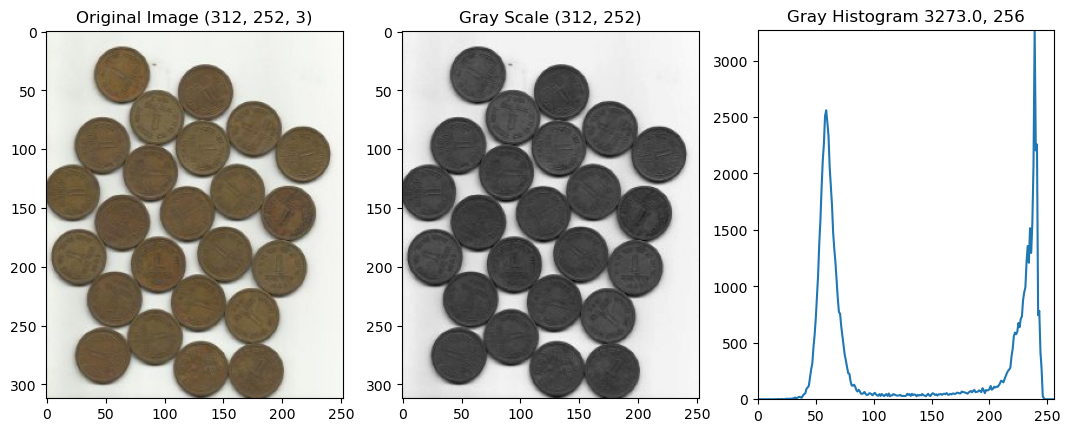

In [216]:
#imgSRC = cv2.imread('PinkAvocado.jpeg')
#imgSRC = cv2.imread('PackingHouse.jpeg')
#
#imgSRC = cv2.imread('Wharehouse.jpg')
#imgSRC = cv2.imread('Pallet.jpeg')
imgSRC = cv2.imread('water_coins.jpg')

imgRGB = cv2.cvtColor(imgSRC, cv2.COLOR_BGR2RGB)
imgGray = cv2.cvtColor(imgSRC, cv2.COLOR_BGR2GRAY)
histGray, hist_centers = histogram(imgGray)

plt.figure()
plt.subplots_adjust(right = 1.7)
plt.subplot(1, 3, 1)
plt.imshow(imgRGB)
plt.title('Original Image ' + str(imgRGB.shape))

plt.subplot(1, 3, 2)
plt.imshow(imgGray, cmap='gray')
plt.title('Gray Scale ' + str(imgGray.shape))

plt.subplot(1, 3, 3)
hist = cv2.calcHist([imgSRC], [0], None, [256], [0, 256])
plt.xlim([0, 256])
plt.ylim([0, hist.max()])
plt.plot(hist)
plt.title('Gray Histogram '+ str(hist.max()) + ', ' + str(hist.size));


# Analisis sin preprocesamiento
## GrayScale | WaterShed | LocalMinima

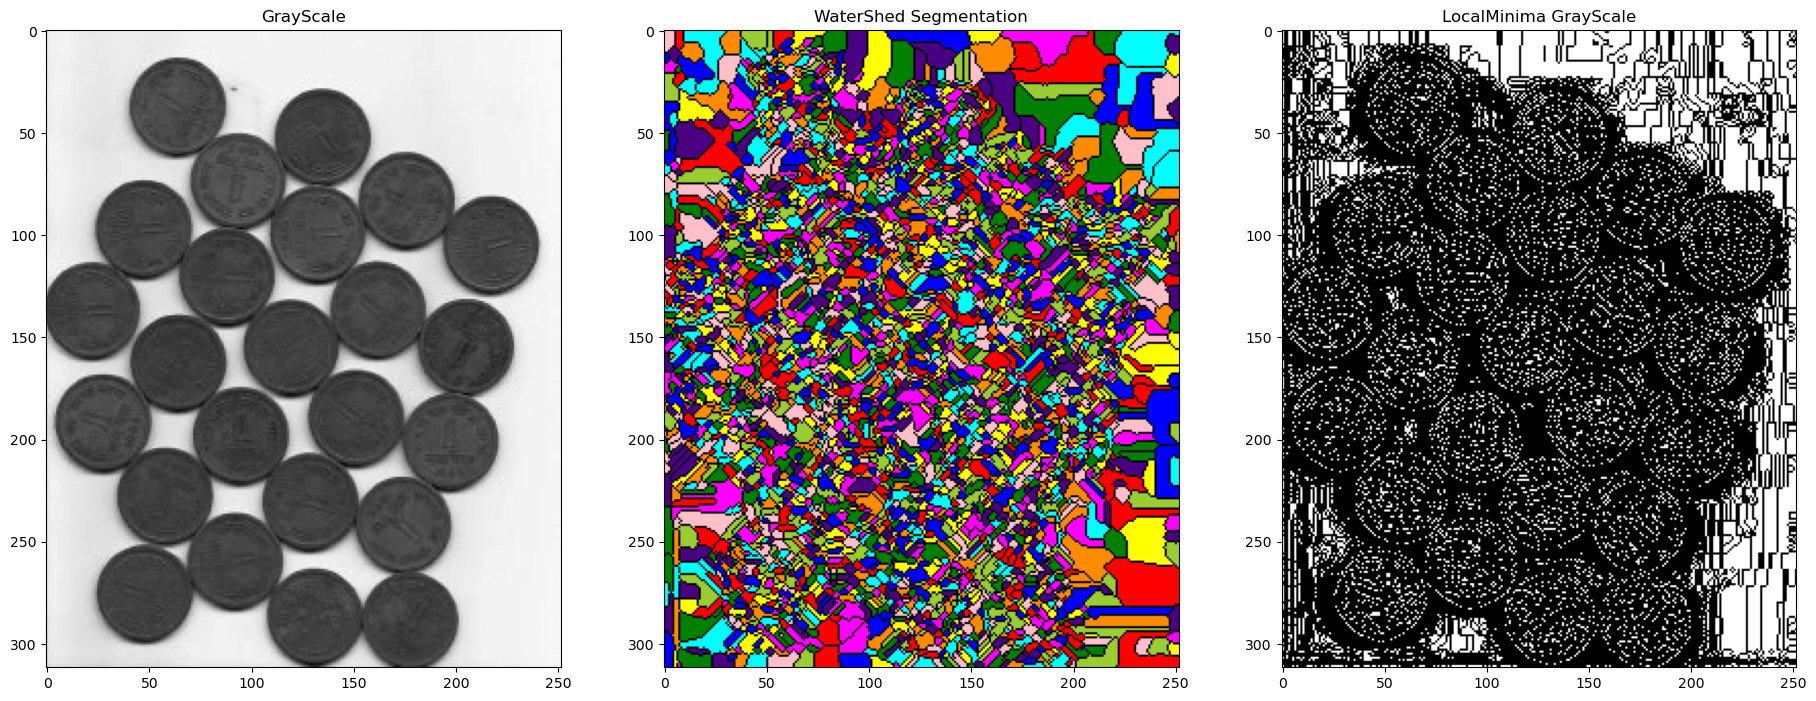

In [217]:
thWaterShed = watershed(imgGray, watershed_line=True)
wSSegmentation = label2rgb(thWaterShed)
imgLocMin = mahotas.locmin((imgGray))

plt.figure(figsize=(20,50))
pl.subplots_adjust(right=1)
plt.subplots_adjust(right=1)

plt.subplot(1, 3, 1)
plt.imshow(imgGray, cmap='gray')
plt.title('GrayScale');

plt.subplot(1, 3, 2)
plt.imshow(wSSegmentation)
plt.title('WaterShed Segmentation');

plt.subplot(1, 3, 3)
plt.imshow(imgLocMin, cmap='gray')
plt.title('LocalMinima GrayScale');

# Detección de bordes - Sobel Algorithm
## SobelX | SobelY | SobelX + SobelY

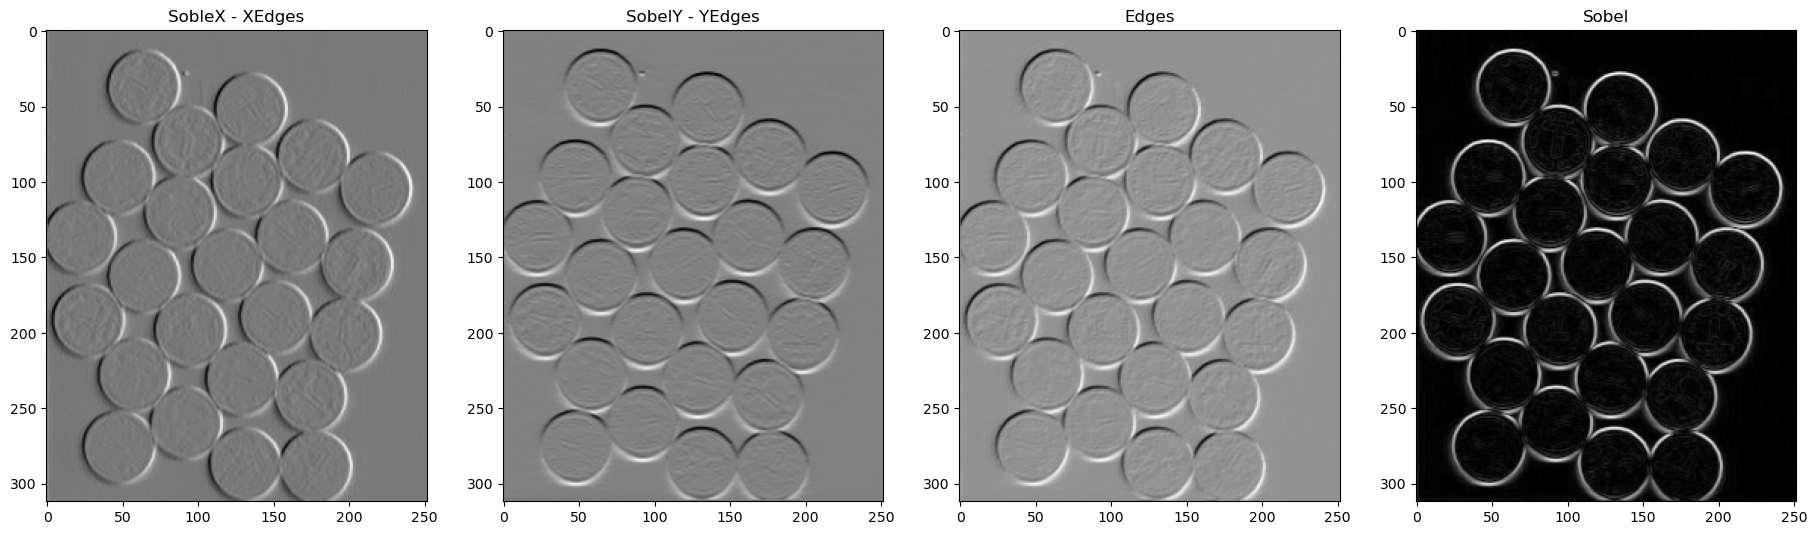

In [218]:
sobelx = cv2.Sobel(imgGray,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(imgGray,cv2.CV_64F,0,1,ksize=3)
edgesXY = sobelx + sobely

elevationMap = sobel(imgGray)

plt.figure(figsize=(20,50))
pl.subplots_adjust(right=1)
plt.subplots_adjust(right=1)

plt.subplot(1, 4, 1)
plt.imshow(sobelx, cmap='gray')
plt.title('SobleX - XEdges');

plt.subplot(1, 4, 2)
plt.imshow(sobely, cmap='gray')
plt.title('SobelY - YEdges');

plt.subplot(1, 4, 3)
plt.imshow(edgesXY, cmap='gray')
plt.title('Edges');

plt.subplot(1, 4, 4)
plt.imshow(elevationMap, cmap='gray')
plt.title('Sobel');


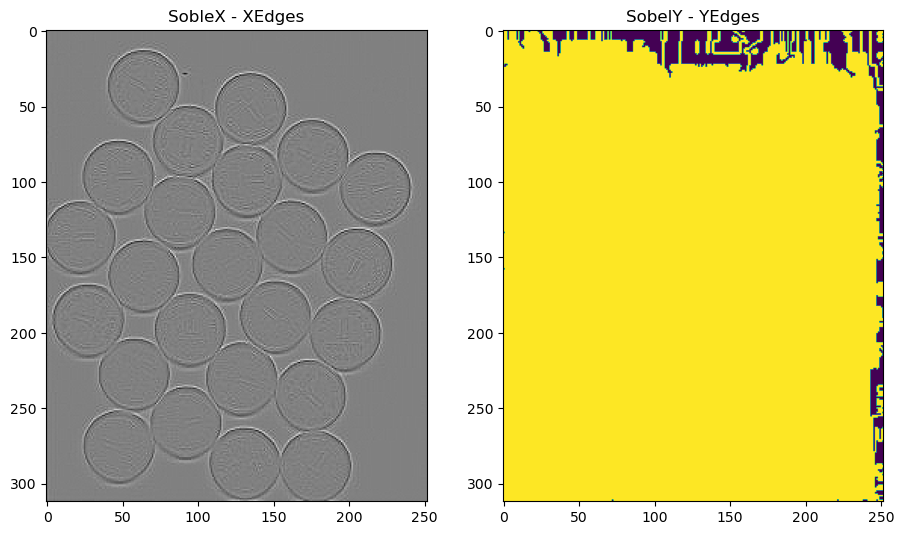

In [225]:
from skimage.feature import canny
edges = canny(imgGray)

from scipy import ndimage as ndi


laplacian = cv2.Laplacian(imgGray,cv2.CV_64F)
fill_coins = ndi.binary_fill_holes(laplacian)

plt.figure(figsize=(20,50))
pl.subplots_adjust(right=1)
plt.subplots_adjust(right=1)

plt.subplot(1, 4, 1)
plt.imshow(-laplacian, cmap='gray')
plt.title('SobleX - XEdges');

plt.subplot(1, 4, 2)
plt.imshow(fill_coins)
plt.title('SobelY - YEdges');

# Combinacion de Bordes
## BitWise | AddWeithed

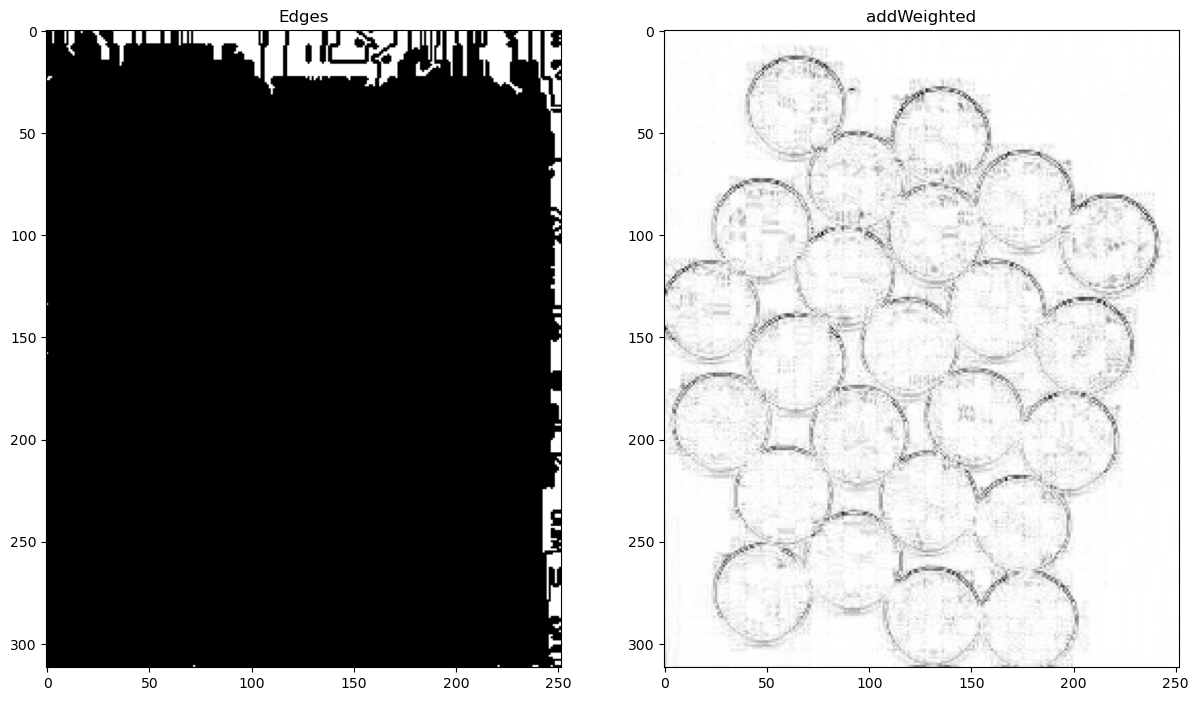

In [220]:
abs_grad_x = cv2.convertScaleAbs(sobelx)
abs_grad_y = cv2.convertScaleAbs(sobely)
absEdges = cv2.convertScaleAbs(edgesXY)
abslaplacian = cv2.convertScaleAbs(laplacian)


edgeOr = cv2.bitwise_xor(abs_grad_x, abs_grad_y)
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0.0)

fill_1 = ndi.binary_fill_holes(~absEdges)
fill_2 = ndi.binary_fill_holes(abslaplacian)
fill_3 = ndi.binary_fill_holes(~grad)

plt.figure(figsize = (20,50))
plt.subplots_adjust(right = 1)

plt.subplot(1, 3, 1)
plt.imshow(fill_1, cmap='gray')
plt.title('edgeOR');

plt.subplot(1, 3, 2)
plt.imshow(~abslaplacian, cmap='gray')
plt.title('addWeighted');

plt.subplot(1, 3, 1)
plt.imshow(~fill_2, cmap='gray')
plt.title('Edges');

# Calculo de Distancia
## x | x

In [221]:
ret, otsuThEdged = cv2.threshold(elevationMap,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
print(ret)

#open = cv2.morphologyEx(otsuThEdged, cv2.MOR)
dist = cv2.distanceTransform(~otsuThEdged, cv2.DIST_L2, 0)
cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)

#kernel = np.ones((3,3),np.uint8)
#closing = cv2.morphologyEx(dist,cv2.MORPH_ERODE, kernel, iterations = 1)

# Normalize the distance image for range = {0.0, 1.0}
# so we can visualize and threshold it

#cv2.imshow('Distance Transform Image', dist)
#ret, dist1 = cv2.threshold(dist, 0.6*dist.max(), 255, 0)

plt.figure(figsize=(20,50))
pl.subplots_adjust(right=1)
plt.subplots_adjust(right=1)

plt.subplot(1, 3, 1)
plt.imshow(absEdges, cmap='gray')
plt.title('GrayScale');

plt.subplot(1, 3, 2)
plt.imshow(-dist, cmap='gray')
plt.title('Image Binarized');

plt.subplot(1, 3, 3)
plt.imshow(-dist, cmap='gray')
plt.title('Image Binarized | Compliment');

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1555: error: (-2:Unspecified error) in function 'double __cdecl cv::threshold(const class cv::_InputArray &,const class cv::_OutputArray &,double,double,int)'
> THRESH_OTSU mode:
>     'src_type == CV_8UC1 || src_type == CV_16UC1'
> where
>     'src_type' is 6 (CV_64FC1)


In [ ]:
#otsuThEdged2 = threshold_otsu(edgeOr)
#print(otsuThEdged2)
#binary2 = edgeOr > otsuThEdged2

#ret, threshEdged = cv2.threshold(closing,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#print(ret)
thWsEdged = watershed(otsuThEdged, watershed_line=True)
wSSegEdged = label2rgb(thWsEdged)
imgLocMinEdged = mahotas.locmin((dist))

plt.figure(figsize=(20,50))
pl.subplots_adjust(right=1)
plt.subplots_adjust(right=1)

plt.subplot(1, 3, 1)
plt.imshow(dist, cmap='gray')
plt.title('GrayScale');

plt.subplot(1, 3, 2)
plt.imshow(wSSegEdged)
plt.title('WaterShed Segmentation');

plt.subplot(1, 3, 3)
plt.imshow(imgLocMinEdged, cmap='gray')
plt.title('LocalMinima GrayScale');

In [ ]:
contours, hierarchy = cv2.findContours(otsuThEdged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print(contours)
for c in contours:
    cv2.drawContours(imgRGB, c, -1, (0, 255, 0), 2)

plt.figure(figsize=(20,50))
pl.subplots_adjust(right=1)
plt.subplots_adjust(right=1)

plt.subplot(1, 3, 1)
plt.imshow(imgRGB)
plt.title('GrayScale');


In [ ]:
otsuTh = threshold_otsu(imgGray)
print(otsuTh)
binary = imgGray > otsuTh

plt.figure(figsize=(20,50))
pl.subplots_adjust(right=1)
plt.subplots_adjust(right=1)

plt.subplot(1, 3, 1)
plt.imshow(imgGray, cmap='gray')
plt.title('GrayScale');

plt.subplot(1, 3, 2)
plt.imshow(binary, cmap='gray')
plt.title('Image Binarized');

plt.subplot(1, 3, 3)
plt.imshow(~binary, cmap='gray')
plt.title('Image Binarized | Compliment');

In [ ]:
# apply Otsu's automatic thresholding which automatically determines
# the best threshold value
(T, threshInv) = cv2.threshold(imgGray, 0, 256, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
print(T)

plt.figure(figsize=(20, 50))
plt.subplot(1, 2, 1)
plt.imshow(threshInv, cmap='gray')
plt.title('s')

masked = cv2.bitwise_and(imgRGB, imgRGB, mask=threshInv)
plt.subplot(1, 2, 2)
plt.imshow(masked)

#cv2.imshow("Output", masked)